In [1]:
import tensorflow as tf
import numpy as np

def scheduler_exp(epoch, lr):
  if epoch < 1:
    return lr
  else:
    return lr * np.exp(-1.0)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')
print('start learning rate:', round(model.optimizer.lr.numpy(), 5))
lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5), epochs=15, callbacks=[lr_scheduler], verbose=1)

start learning rate: 0.01
Epoch 1/15

Epoch 00001: LearningRateScheduler reducing learning rate to 0.009999999776482582.
1/1 [==============================] - 0s 200ms/step - loss: 2386.1523
Epoch 2/15

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0036787943294869607.
1/1 [==============================] - 0s 2ms/step - loss: 40188472.0000
Epoch 3/15

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0013533527735202996.
1/1 [==============================] - 0s 2ms/step - loss: 89527156736.0000
Epoch 4/15

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0004978706704056293.
1/1 [==============================] - 0s 3ms/step - loss: 25061541019648.0000
Epoch 5/15

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00018315638425888493.
1/1 [==============================] - 0s 3ms/step - loss: 764447471697920.0000
Epoch 6/15

Epoch 00006: LearningRateScheduler reducing learning rate to 6.73794688923822e-05.
1/1 [===============

In [13]:
import tensorflow as tf
import numpy as np

def scheduler_exp(epoch):
  initial_lr = 0.01
  if epoch < 1:
    return initial_lr
  else:
    return initial_lr * np.exp(-1.0)**epoch

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')
print('start learning rate:', round(model.optimizer.lr.numpy(), 5))
lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5), epochs=15, callbacks=[lr_scheduler], verbose=1)

start learning rate: 0.01
Epoch 1/15

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
1/1 [==============================] - 0s 171ms/step - loss: 5410.7993
Epoch 2/15

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0036787944117144234.
1/1 [==============================] - 0s 4ms/step - loss: 91285000.0000
Epoch 3/15

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0013533528323661271.
1/1 [==============================] - 0s 2ms/step - loss: 203354062848.0000
Epoch 4/15

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0004978706836786395.
1/1 [==============================] - 0s 2ms/step - loss: 56925370712064.0000
Epoch 5/15

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00018315638888734184.
1/1 [==============================] - 0s 2ms/step - loss: 1736384142376960.0000
Epoch 6/15

Epoch 00006: LearningRateScheduler reducing learning rate to 6.737946999085469e-05.
1/1 [============================

In [15]:
epoch_list = range(30)
lr_list = [scheduler_exp(epoch) for epoch in epoch_list]

In [18]:
import matplotlib.pyplot as plt

def plot_scheduler(epoch_list, lr_list, title=None):
  plt.figure(figsize=(6, 4))
  plt.plot(epoch_list, lr_list)
  plt.xlabel('epoch')
  plt.ylabel('learning rate')
  plt.title(title)

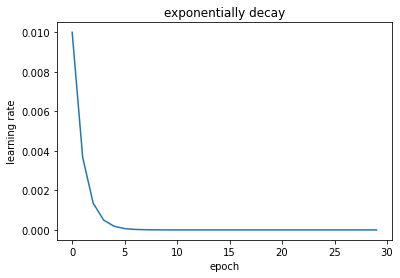

In [19]:
plot_scheduler(epoch_list, lr_list, 'exponentially decay')

In [20]:
def step_decay(epoch):
  initial_lr = 0.1
  drop = 0.5
  epochs_drop = 5.0
  lr = initial_lr * (drop ** np.floor(epoch/epochs_drop))
  print(f'epoch: {epoch}, lr: {lr}')
  
  return lr

epoch: 0, lr: 0.1
epoch: 1, lr: 0.1
epoch: 2, lr: 0.1
epoch: 3, lr: 0.1
epoch: 4, lr: 0.1
epoch: 5, lr: 0.05
epoch: 6, lr: 0.05
epoch: 7, lr: 0.05
epoch: 8, lr: 0.05
epoch: 9, lr: 0.05
epoch: 10, lr: 0.025
epoch: 11, lr: 0.025
epoch: 12, lr: 0.025
epoch: 13, lr: 0.025
epoch: 14, lr: 0.025
epoch: 15, lr: 0.0125
epoch: 16, lr: 0.0125
epoch: 17, lr: 0.0125
epoch: 18, lr: 0.0125
epoch: 19, lr: 0.0125
epoch: 20, lr: 0.00625
epoch: 21, lr: 0.00625
epoch: 22, lr: 0.00625
epoch: 23, lr: 0.00625
epoch: 24, lr: 0.00625
epoch: 25, lr: 0.003125
epoch: 26, lr: 0.003125
epoch: 27, lr: 0.003125
epoch: 28, lr: 0.003125
epoch: 29, lr: 0.003125


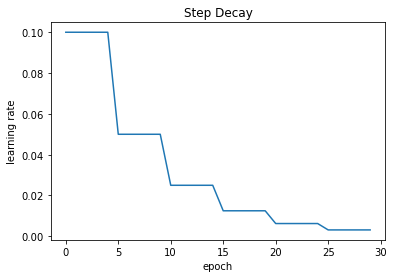

In [21]:
lr_list = [step_decay(epoch) for epoch in epoch_list]
plot_scheduler(epoch_list, lr_list, title='Step Decay')

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')
print('start learning rate:', round(model.optimizer.lr.numpy(), 5))
lr_scheduler = LearningRateScheduler(step_decay, verbose=1)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5), epochs=15, callbacks=[lr_scheduler], verbose=1)

start learning rate: 0.01
Epoch 1/15
epoch: 0, lr: 0.1

Epoch 00001: LearningRateScheduler reducing learning rate to 0.1.
1/1 [==============================] - 0s 167ms/step - loss: 8230.1689
Epoch 2/15
epoch: 1, lr: 0.1

Epoch 00002: LearningRateScheduler reducing learning rate to 0.1.
1/1 [==============================] - 0s 3ms/step - loss: 14087798784.0000
Epoch 3/15
epoch: 2, lr: 0.1

Epoch 00003: LearningRateScheduler reducing learning rate to 0.1.
1/1 [==============================] - 0s 2ms/step - loss: 24145322590601216.0000
Epoch 4/15
epoch: 3, lr: 0.1

Epoch 00004: LearningRateScheduler reducing learning rate to 0.1.
1/1 [==============================] - 0s 2ms/step - loss: 41383090587147731730432.0000
Epoch 5/15
epoch: 4, lr: 0.1

Epoch 00005: LearningRateScheduler reducing learning rate to 0.1.
1/1 [==============================] - 0s 3ms/step - loss: 70927186710676075236909121536.0000
Epoch 6/15
epoch: 5, lr: 0.05

Epoch 00006: LearningRateScheduler reducing learning

In [23]:
from tensorflow.keras.experimental import CosineDecay

cos_decay = CosineDecay(initial_learning_rate=1e-2, decay_steps=30, alpha=1e-2)

type(cos_decay)

tensorflow.python.keras.optimizer_v2.learning_rate_schedule.CosineDecay

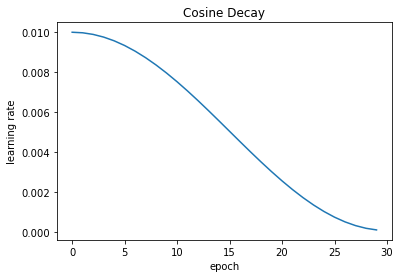

In [26]:
steps_list = range(0, 30)
lr_list = cos_decay(steps_list)

plot_scheduler(steps_list, lr_list, 'Cosine Decay')

In [27]:
model = Sequential([Dense(10)])

model.compile(tf.keras.optimizers.Adam(learning_rate=cos_decay), loss='mse')

history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5), epochs=15, verbose=1)

Epoch 1/15
1/1 [==============================] - 0s 248ms/step - loss: 9379.4160
Epoch 2/15
1/1 [==============================] - 0s 2ms/step - loss: 7636.6978
Epoch 3/15
1/1 [==============================] - 0s 2ms/step - loss: 6162.2461
Epoch 4/15
1/1 [==============================] - 0s 2ms/step - loss: 4934.3789
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 3921.6099
Epoch 6/15
1/1 [==============================] - 0s 2ms/step - loss: 3099.9470
Epoch 7/15
1/1 [==============================] - 0s 2ms/step - loss: 2447.0132
Epoch 8/15
1/1 [==============================] - 0s 2ms/step - loss: 1937.7068
Epoch 9/15
1/1 [==============================] - 0s 2ms/step - loss: 1545.1188
Epoch 10/15
1/1 [==============================] - 0s 2ms/step - loss: 1243.8196
Epoch 11/15
1/1 [==============================] - 0s 4ms/step - loss: 1012.4701
Epoch 12/15
1/1 [==============================] - 0s 2ms/step - loss: 834.2487
Epoch 13/15
1/1 [===================

In [28]:
decay_steps = 30
alpha = 0.0
initial_learning_rate = 0.01

def decayed_learning_rate(step):
  step = min(step, decay_steps)
  cosine_decay = 0.5 * (1 + np.cos(np.pi * step / decay_steps))
  decayed = (1 - alpha) * cosine_decay + alpha
  
  return initial_learning_rate * decayed

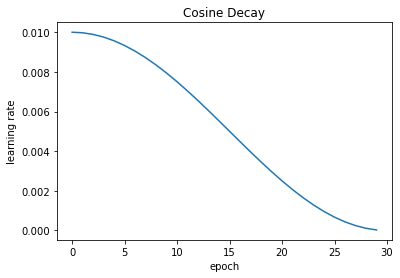

In [29]:
steps_list = range(30)
lr_list = [decayed_learning_rate(step) for step in steps_list]

plot_scheduler(steps_list, lr_list, 'Cosine Decay')

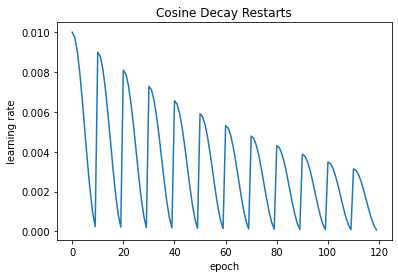

In [30]:
from tensorflow.keras.experimental import CosineDecayRestarts

cos_decay_restarts = CosineDecayRestarts(initial_learning_rate=0.01, first_decay_steps=10, t_mul=1, m_mul=0.9, alpha=0)
steps_list = range(120)
lr_list = cos_decay_restarts(steps_list)

plot_scheduler(steps_list, lr_list, 'Cosine Decay Restarts')

In [31]:
model = Sequential([Dense(10)])

model.compile(tf.keras.optimizers.Adam(learning_rate=cos_decay_restarts), loss='mse')

history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5), epochs=15, verbose=1)

Epoch 1/15
1/1 [==============================] - 0s 268ms/step - loss: 8316.5518
Epoch 2/15
1/1 [==============================] - 0s 2ms/step - loss: 6733.2373
Epoch 3/15
1/1 [==============================] - 0s 2ms/step - loss: 5368.5220
Epoch 4/15
1/1 [==============================] - 0s 1ms/step - loss: 4298.3613
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 3502.8977
Epoch 6/15
1/1 [==============================] - 0s 1ms/step - loss: 2934.2439
Epoch 7/15
1/1 [==============================] - 0s 2ms/step - loss: 2549.5234
Epoch 8/15
1/1 [==============================] - 0s 2ms/step - loss: 2308.3572
Epoch 9/15
1/1 [==============================] - 0s 2ms/step - loss: 2174.1292
Epoch 10/15
1/1 [==============================] - 0s 3ms/step - loss: 2114.5007
Epoch 11/15
1/1 [==============================] - 0s 2ms/step - loss: 2099.5334
Epoch 12/15
1/1 [==============================] - 0s 13ms/step - loss: 1604.5675
Epoch 13/15
1/1 [=================

epoch: 0 lr: 1e-05
epoch: 1 lr: 0.0020080000000000002
epoch: 2 lr: 0.004006
epoch: 3 lr: 0.006004000000000001
epoch: 4 lr: 0.008002
epoch: 5 lr: 0.01
epoch: 6 lr: 0.01
epoch: 7 lr: 0.01
epoch: 8 lr: 0.01
epoch: 9 lr: 0.01
epoch: 10 lr: 0.01
epoch: 11 lr: 0.01
epoch: 12 lr: 0.01
epoch: 13 lr: 0.01
epoch: 14 lr: 0.01
epoch: 15 lr: 0.01
epoch: 16 lr: 0.01
epoch: 17 lr: 0.0075
epoch: 18 lr: 0.0075
epoch: 19 lr: 0.005625
epoch: 20 lr: 0.005625
epoch: 21 lr: 0.00421875
epoch: 22 lr: 0.00421875
epoch: 23 lr: 0.0031640625
epoch: 24 lr: 0.0031640625
epoch: 25 lr: 0.002373046875
epoch: 26 lr: 0.002373046875
epoch: 27 lr: 0.00177978515625
epoch: 28 lr: 0.00177978515625
epoch: 29 lr: 0.0013348388671875


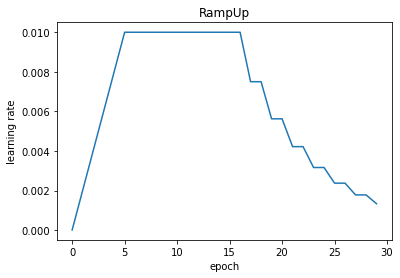

In [36]:
LR_START = 1e-5
LR_MAX = 1e-2
LR_RAMPUP_EPOCHS = 5
LR_SUSTAIN_EPOCHS = 10
LR_STEP_DECAY = 0.75

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = ((LR_MAX - LR_START) / LR_RAMPUP_EPOCHS) * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
    print('epoch:', epoch, 'lr:', lr)
    return lr

lr_list = [lrfn(epoch) for epoch  in epoch_list]

plot_scheduler(epoch_list, lr_list, title='RampUp')

epoch: 0 lr: 1e-05
epoch: 1 lr: 0.00334
epoch: 2 lr: 0.00667
epoch: 3 lr: 0.01
epoch: 4 lr: 0.01
epoch: 5 lr: 0.01
epoch: 6 lr: 0.01
epoch: 7 lr: 0.01
epoch: 8 lr: 0.0075
epoch: 9 lr: 0.0075
epoch: 10 lr: 0.005625
epoch: 11 lr: 0.005625
epoch: 12 lr: 0.00421875
epoch: 13 lr: 0.00421875
epoch: 14 lr: 0.0031640625
epoch: 15 lr: 0.0031640625
epoch: 16 lr: 0.002373046875
epoch: 17 lr: 0.002373046875
epoch: 18 lr: 0.00177978515625
epoch: 19 lr: 0.00177978515625
epoch: 20 lr: 0.0013348388671875
epoch: 21 lr: 0.0013348388671875
epoch: 22 lr: 0.001001129150390625
epoch: 23 lr: 0.001001129150390625
epoch: 24 lr: 0.0007508468627929688
epoch: 25 lr: 0.0007508468627929688
epoch: 26 lr: 0.0005631351470947266
epoch: 27 lr: 0.0005631351470947266
epoch: 28 lr: 0.00042235136032104493
epoch: 29 lr: 0.00042235136032104493


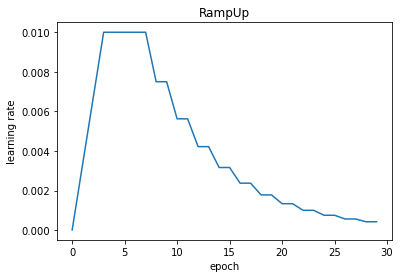

In [37]:
def lrfn(epoch):
  LR_START = 1e-5
  LR_MAX = 1e-2
  LR_RAMPUP_EPOCHS = 3
  LR_SUSTAIN_EPOCHS = 3
  LR_STEP_DECAY = 0.75

  def calc_fn(epoch):
      if epoch < LR_RAMPUP_EPOCHS:
          lr = ((LR_MAX - LR_START) / LR_RAMPUP_EPOCHS) * epoch + LR_START
      elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
          lr = LR_MAX
      else:
          lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
      print('epoch:', epoch, 'lr:', lr)
      
      return lr

  return calc_fn(epoch)

lr_list = [lrfn(epoch) for epoch  in epoch_list]

plot_scheduler(epoch_list, lr_list, title='RampUp')

In [38]:
model = Sequential([Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')

lr_scheduler = LearningRateScheduler(lrfn)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5), epochs=30, callbacks=[lr_scheduler], verbose=1)

Epoch 1/30
epoch: 0 lr: 1e-05
1/1 [==============================] - 0s 185ms/step - loss: 2142.3811
Epoch 2/30
epoch: 1 lr: 0.00334
1/1 [==============================] - 0s 3ms/step - loss: 1621.5529
Epoch 3/30
epoch: 2 lr: 0.00667
1/1 [==============================] - 0s 4ms/step - loss: 2936605.5000
Epoch 4/30
epoch: 3 lr: 0.01
1/1 [==============================] - 0s 3ms/step - loss: 21915518976.0000
Epoch 5/30
epoch: 4 lr: 0.01
1/1 [==============================] - 0s 4ms/step - loss: 370467235954688.0000
Epoch 6/30
epoch: 5 lr: 0.01
1/1 [==============================] - 0s 3ms/step - loss: 6262500472951668736.0000
Epoch 7/30
epoch: 6 lr: 0.01
1/1 [==============================] - 0s 5ms/step - loss: 105863405273622572433408.0000
Epoch 8/30
epoch: 7 lr: 0.01
1/1 [==============================] - 0s 4ms/step - loss: 1789550223416417793020526592.0000
Epoch 9/30
epoch: 8 lr: 0.0075
1/1 [==============================] - 0s 3ms/step - loss: 30251149048051282637857293860864.0000